In [1]:
import pandas as pd
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/shank/Downloads/vaccination+for+justified+user+system+-code/vaccination for justified user system -code/dataset/vaccination_tweets.csv")
data.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [3]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.518000e+03,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000
mean,1.341949e+18,6.342983e+04,1170.952740,13380.415012,1.715250,10.464654
std,2.768504e+15,4.762127e+05,2469.263253,41706.034152,12.237077,74.644921
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.339437e+18,1.140000e+02,165.000000,342.000000,0.000000,0.000000
50%,1.341481e+18,6.060000e+02,441.000000,1659.000000,0.000000,1.000000
75%,1.344353e+18,2.978000e+03,1191.000000,9733.750000,1.000000,4.000000
max,1.347131e+18,1.371493e+07,64441.000000,924667.000000,446.000000,2129.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2518 non-null   int64 
 1   user_name         2518 non-null   object
 2   user_location     1998 non-null   object
 3   user_description  2394 non-null   object
 4   user_created      2518 non-null   object
 5   user_followers    2518 non-null   int64 
 6   user_friends      2518 non-null   int64 
 7   user_favourites   2518 non-null   int64 
 8   user_verified     2518 non-null   bool  
 9   date              2518 non-null   object
 10  text              2518 non-null   object
 11  hashtags          1884 non-null   object
 12  source            2517 non-null   object
 13  retweets          2518 non-null   int64 
 14  favorites         2518 non-null   int64 
 15  is_retweet        2518 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 280.4+ KB


In [5]:
data.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [4]:
columns = []
for i in data.columns:
  columns.append(i)
columns

['id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet']

In [9]:

data.isnull().any()

id                  False
user_name           False
user_location        True
user_description     True
user_created        False
user_followers      False
user_friends        False
user_favourites     False
user_verified       False
date                False
text                False
hashtags             True
source               True
retweets            False
favorites           False
is_retweet          False
dtype: bool

In [10]:
data.isnull().sum()

id                    0
user_name             0
user_location       520
user_description    124
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            634
source                1
retweets              0
favorites             0
is_retweet            0
dtype: int64

<AxesSubplot:>

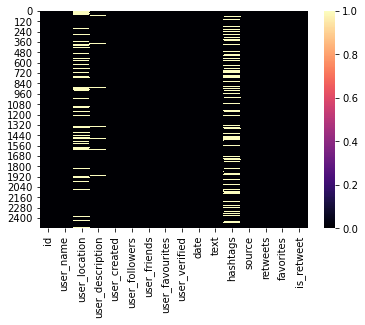

In [4]:
sns.heatmap(data.isnull(),cmap='magma')

In [5]:
data.shape

(2518, 16)

In [5]:
null_value_columns = []
for i in data.columns:
  if data[i].isnull().any() == True:
    null_value_columns.append(i)
null_value_columns

['user_location', 'user_description', 'hashtags', 'source']

In [6]:
np.where(data['user_location'].isnull())

np.where(data['user_description'].isnull())

np.where(data['hashtags'].isnull())

np.where(data['source'].isnull())

(array([1839], dtype=int64),)

In [8]:
null_value_columns

['user_location', 'user_description', 'hashtags', 'source']

In [7]:
data['user_location'] = data["user_location"].fillna("Location Unavialable")
data['user_description'] = data["user_description"].fillna("User Description Unavialable")
data['hashtags'] = data["hashtags"].fillna("Hashtag Unavialable")
data['source'] = data["source"].fillna("Source Unavialable")

In [10]:
data.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [11]:
data.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,Hashtag Unavialable,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [12]:
data.shape

(2518, 16)

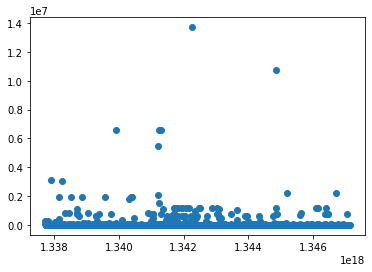

In [14]:
plt.scatter(data['id'],data['user_followers'])

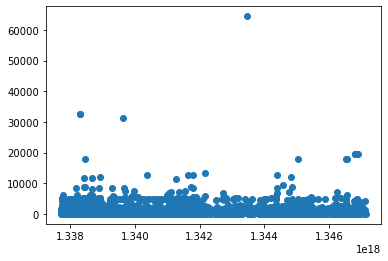

In [15]:
plt.scatter(data['id'],data['user_friends'])

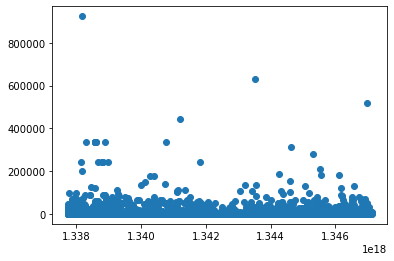

In [16]:
plt.scatter(data['id'],data['user_favourites'])

In [8]:
from sklearn.preprocessing import LabelEncoder
data['user_name'] = LabelEncoder().fit_transform(data['user_name'])
data['user_location'] = LabelEncoder().fit_transform(data["user_location"])
data['user_description'] = LabelEncoder().fit_transform(data["user_description"])
data['hashtags'] = LabelEncoder().fit_transform(data["hashtags"])
data['source'] = LabelEncoder().fit_transform(data["source"])

In [9]:
data.drop('date',axis =1,inplace=True)

In [10]:
data.head(2)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,1139,386,140,2009-04-08 17:52:46,405,1692,3247,False,Same folks said daikon paste could treat a cyt...,754,23,0,0,False
1,1338158543359250433,63,647,867,2009-09-21 15:27:30,834,666,178,False,While the world has been on the wrong side of ...,0,22,1,1,False


In [11]:
data.drop('user_created',axis = 1,inplace=True)

In [12]:
data['user_verified'].replace(False,0,inplace=True)
data['user_verified'].replace(True,1,inplace=True)
data['user_verified'] =data['user_verified'].astype(int)

In [13]:
data.drop('is_retweet',axis = 1,inplace=True)

In [15]:
data.drop('id',axis = 1,inplace=True)

KeyError: "['id'] not found in axis"

<AxesSubplot:xlabel='user_name', ylabel='count'>

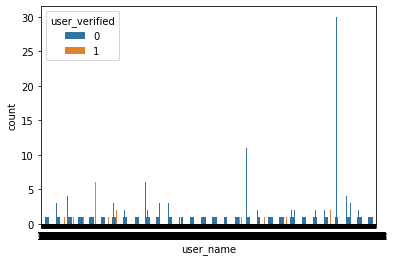

In [16]:
sns.countplot(x='user_name',hue='user_verified',data=data)

In [17]:
take = []
drop = []
for j in data.columns:
  if j == 'text' or j == 'user_verified':
    take.append(j)
  else:
    drop.append(j)

drop

data.drop(drop,axis=1,inplace=True)

In [18]:
x = data['text']
y = data['user_verified']

In [19]:
verified_user = []
not_verified_user = []
for i in data['user_verified']:
  if i == 1:
    verified_user.append(i)
  else:
    not_verified_user.append(i)

In [20]:
print("percentage of verified user = ",((len(verified_user)/len(data['user_verified']))*100))

print("percentage of not verified user = ",((len(not_verified_user)/len(data['user_verified']))*100))

percentage of verified user =  14.138204924543288
percentage of not verified user =  85.86179507545671


In [21]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [22]:
tokenizer = Tokenizer(10000,lower=True)
tokenizer.fit_on_texts(x)

In [23]:
sequence = tokenizer.texts_to_sequences(x)
final_input = pad_sequences(sequence,maxlen=200,padding='pre')

In [24]:
final_output = np.array(y)

In [25]:
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM,Dense,Embedding

In [26]:
model = Sequential()
model.add(
    Embedding(
        input_dim=10000,
        output_dim=120,
        input_length=200,
    ),)
model.add(
    Bidirectional(LSTM(64, return_sequences=True))
)
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 120)          1200000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 128)          94720     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,336,001
Trainable params: 1,336,001
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
pred = model.fit(final_input,final_output,epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 57s 192ms/step - loss: 2.2259 - accuracy: 0.8557
Epoch 2/5
79/79 [==============================] - 16s 196ms/step - loss: 2.3016 - accuracy: 0.8508
Epoch 3/5
79/79 [==============================] - 19s 239ms/step - loss: 2.2890 - accuracy: 0.8516
Epoch 4/5
79/79 [==============================] - 17s 214ms/step - loss: 2.2447 - accuracy: 0.8545
Epoch 5/5
79/79 [==============================] - 16s 208ms/step - loss: 2.2278 - accuracy: 0.8556


In [29]:
model.save("vaccine delivery.h5")

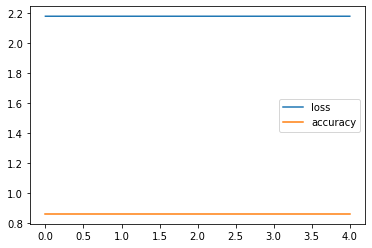

In [30]:
plt.plot(pred.history['loss'],label='loss')
plt.plot(pred.history['accuracy'],label='accuracy')
plt.legend(loc='best')
plt.show()

In [34]:
def verification(details):
  sentence_list = []
  sentence_list.append(details)
  fit = tokenizer.texts_to_sequences(sentence_list)
  sequence = pad_sequences(fit,maxlen=80,padding='pre')
  output = model.predict_classes(sequence)
  if output.all() == 1:
    print("Verified User")
  else:
    print("User is not verified")

In [35]:
verification("While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev…")

User is not verified
